In [580]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("..\\Dataset\\reccomender.csv")
x = df[['age','weight(kg)','height(m)','gender','activity_level']]
y = df.calories
print("x: \n", x.count(), end="\n\n")
print("y: \n", y.count(), end="\n\n")

x: 
 age               10726
weight(kg)        10726
height(m)         10726
gender            10726
activity_level    10726
dtype: int64

y: 
 10726



In [564]:
# Creazione dell'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle variabili categoriche come valori numerici
x_encoded = x.copy()

x_encoded['age'] = label_encoder.fit_transform(x['age'])
x_encoded['weight(kg)'] = label_encoder.fit_transform(x['weight(kg)'])
x_encoded['height(m)'] = label_encoder.fit_transform(x['height(m)'])
x_encoded['gender'] = label_encoder.fit_transform(x['gender'])
x_encoded['activity_level'] = label_encoder.fit_transform(x['activity_level'])
#x_encoded['BMR'] = label_encoder.fit_transform(x['BMR'])

In [565]:

# Creazione dell'oggetto OneHotEncoder

encoder = OneHotEncoder()
x_encoded = x_encoded.values
# Adattamento del modello agli dati
encoder.fit(x_encoded)

# Trasformazione dei dati di addestramento
x_encoded = encoder.transform(x_encoded).toarray()


In [581]:
# Creazione di un oggetto StandardScaler
scaler = StandardScaler()

# Trasformazione e adattamento dei dati di addestramento
x_scaled = scaler.fit_transform(x)

In [582]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Suddivisione iniziale in set di addestramento + convalida e test
x_train_val, x_test, y_train_val, y_test = train_test_split(x_encoded, y, test_size=0.15, random_state=42)

# Ulteriore suddivisione del set di addestramento + convalida in set di addestramento e convalida
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.15, random_state=42)

model = xgb.XGBRegressor()
model.fit(x_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [583]:
model1 = KNeighborsRegressor()
model1.fit(x_train, y_train)

KNeighborsRegressor()

In [585]:
# Calcolo delle previsioni
y_pred = model1.predict(x_val)

# Calcolo del MSE
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)


Mean Squared Error: 6372.226322178702
Root Mean Squared Error: 79.82622577936841
r2: 0.9569191254839309


In [579]:
y_p = model.predict([[2,16.09,0.93,1,1.2]])
print(y_p) 

[-335.9329]


In [488]:
#print(len(X_resampled))
#print(len(y_resampled))

print(y_resampled.value_counts())

Mediterranean_diet    17
alkaline_diet         17
dash_diet             17
gluten_free_diet      17
high_fiber_diet       17
high_protien_diet     17
hormone_diet          17
ketogenic_diet        17
low_carb_diet         17
low_fat_diet          17
low_sodium_diet       17
omni_diet             17
paleo_diet            17
type_o_diet           17
vegan_diet            17
Name: Diet, dtype: int64


In [498]:


# Caricamento dei dati di addestramento, validazione e test
#X_train, X_test, y_train, y_test = train_test_split(xUser__scaled, y, test_size=0.3, random_state=42)

# Suddivisione iniziale in set di addestramento + convalida e test
x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, test_size=0.15, random_state=42)

# Ulteriore suddivisione del set di addestramento + convalida in set di addestramento e convalida
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.15, random_state=42)


# Creazione del modello KNN
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='linear')
clf4 = RandomForestClassifier(n_estimators=50)
clf5 = MLPClassifier(verbose=True, hidden_layer_sizes=(100,), tol = 0.0001, max_iter = 1000)

# Creazione del VotingClassifier
voting_clf = VotingClassifier(estimators=[('knn', clf2), ('svc', clf3), ('rf', clf4)], voting='hard')

# Addestramento del modello
clf4.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [490]:
evaluation_metrics(x_val, y_val, clf4)

Accuracy: 0.1212
Precision: 0.0933
Recall: 0.0833
F1 Score: 0.0822


C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GRID SEARCH

In [287]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

params = {'hidden_layer_sizes': [(100,),(100,100,),(100,50,),(100,50,50)],
          'activation': ['identity','logistic','tanh','relu'],
          'solver':['lbfgs','sgd','adam'],
          'learning_rate':['constant','invscaling','adaptive']}

clf_optimized = GridSearchCV(clf5,param_grid=params,cv=10,n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Number of CPUs in the system: 8


C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [284]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

params = {'n_estimators': [50, 100, 200],
          'class_weight': ['balanced', None],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[4,7,10]}

clf_optimized = GridSearchCV(clf4,param_grid=params,cv=10,n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Number of CPUs in the system: 8


C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Migliori iperparametri: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}


In [279]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

params = {'C': [1, 2, 3],
          'class_weight': ['balanced', None]}

clf_optimized = GridSearchCV(clf3,param_grid=params,cv=10,n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Number of CPUs in the system: 8


C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Migliori iperparametri: {'C': 1, 'class_weight': 'balanced'}


In [276]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

params = {'n_neighbors': [3, 5, 8, 10],
          'weights': ['uniform','distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

clf_optimized = GridSearchCV(clf2,param_grid=params,cv=5, n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Number of CPUs in the system: 8
Migliori iperparametri: {'algorithm': 'kd_tree', 'n_neighbors': 8, 'weights': 'distance'}


In [229]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

params = {'splitter': ['best','random'],
          'max_features': ['sqrt','log2','auto'],
          'class_weight': ['balanced', None],
          'max_depth': [4, 7, 10]}

clf_optimized = GridSearchCV(clf1,param_grid=params,cv=5,n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Number of CPUs in the system: 8


Migliori iperparametri: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'best'}


In [282]:
# Assegnazione dei migliori parametri al classificatore
best_params = clf_optimized.best_params_
clf4.set_params(**best_params)
clf4.fit(x_train,y_train)



RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=50)

In [217]:
def evaluation_metrics(x, y, clf):

    y_pred = clf.predict(x)

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average="macro")
    recall = recall_score(y, y_pred, average="macro")
    f1 = f1_score(y, y_pred, average="macro")

    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))

In [283]:
evaluation_metrics(x_test, y_test, clf4)

Accuracy: 0.9831
Precision: 0.8909
Recall: 0.9167
F1 Score: 0.9027


C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
dataset = pd.read_csv("../Dataset/Processed/mealsProcessed.csv")
dataset.set_index("Meal_Id")
#Seprating dataset into input and output values
#print(x.to_string())
x = dataset[['Meal_Id','Name','catagory','description','Veg_Non','Nutrient','Disease','Diet']]
x1 = dataset[['catagory','Veg_Non','Nutrient','Diet']]
#x.drop_duplicates(subset=['Meal_Id'], keep = 'first')
print(x)

      Meal_Id                 Name catagory  \
0           1  summer squash salad    salad   
1           1  summer squash salad    salad   
2           1  summer squash salad    salad   
3           1  summer squash salad    salad   
4           1  summer squash salad    salad   
...       ...                  ...      ...   
7231      309          puffed rice     rice   
7232      309          puffed rice     rice   
7233      309          puffed rice     rice   
7234      309          puffed rice     rice   
7235      309          puffed rice     rice   

                                            description  Veg_Non   Nutrient  \
0     white balsamic vinegar,lemon juice,lemon rind,...      veg      fiber   
1     white balsamic vinegar,lemon juice,lemon rind,...      veg      fiber   
2     white balsamic vinegar,lemon juice,lemon rind,...      veg      fiber   
3     white balsamic vinegar,lemon juice,lemon rind,...      veg      fiber   
4     white balsamic vinegar,lemon juice

## encoder

In [4]:
# Creazione dell'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle variabili categoriche come valori numerici
X_encoded = x1.copy()
#X_encoded['Name'] = label_encoder.fit_transform(x['Name'])
X_encoded['catagory'] = label_encoder.fit_transform(x1['catagory'])
#X_encoded['description'] = label_encoder.fit_transform(x['description'])
X_encoded['Veg_Non'] = label_encoder.fit_transform(x1['Veg_Non'])
X_encoded['Nutrient'] = label_encoder.fit_transform(x1['Nutrient'])
#X_encoded['Disease'] = label_encoder.fit_transform(x['Disease'])
X_encoded['Diet'] = label_encoder.fit_transform(x1['Diet'])


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Creazione dell'oggetto OneHotEncoder
encoder = OneHotEncoder()
X_encoded = X_encoded.values
# Adattamento del modello agli dati
encoder.fit(X_encoded)

# Trasformazione dei dati di addestramento
X_encoded = encoder.transform(X_encoded).toarray()


## Standard scaler

In [6]:
from sklearn.preprocessing import StandardScaler

# Creazione di un oggetto StandardScaler
scaler = StandardScaler()

# Trasformazione e adattamento dei dati di addestramento
X_scaled = scaler.fit_transform(X_encoded)

In [83]:
print(X_scaled)

[[-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]
 [-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]
 [-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]
 ...
 [-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]
 [-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]
 [-0.07071068 -0.05768697 -0.1304083  ... -0.086711   -0.38686735
  -0.18680745]]


## Oversampling

In [6]:
#%pip install scikit-learn==1.2.2

In [44]:
from sklearn.utils._param_validation import _MissingValues
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros = ros.fit_resample(X_scaled)
# new class distribution 
Counter({0: 9844, 1: 9844})

TypeError: fit_resample() missing 1 required positional argument: 'y'

In [ ]:
print(x_ros)

     bmi  gender  age
0     17       1   38
1     11       1   34
2     13       1   32
3     15       1   45
4     18       1   48
..   ...     ...  ...
547   15       0   31
548   16       0   35
549   16       0   35
550   16       1   47
551   16       1   47

[552 rows x 3 columns]


In [ ]:
print(y_ros)

0      2111
1      2288
2      2660
3      2255
4      2604
       ... 
547    2778
548    2885
549    2885
550    3084
551    3084
Name: calorie_intake, Length: 552, dtype: int64


## Gerarchico

In questa parte vogliamo analizzare in base a cosa potrebbero essere raggruppate le varie diete

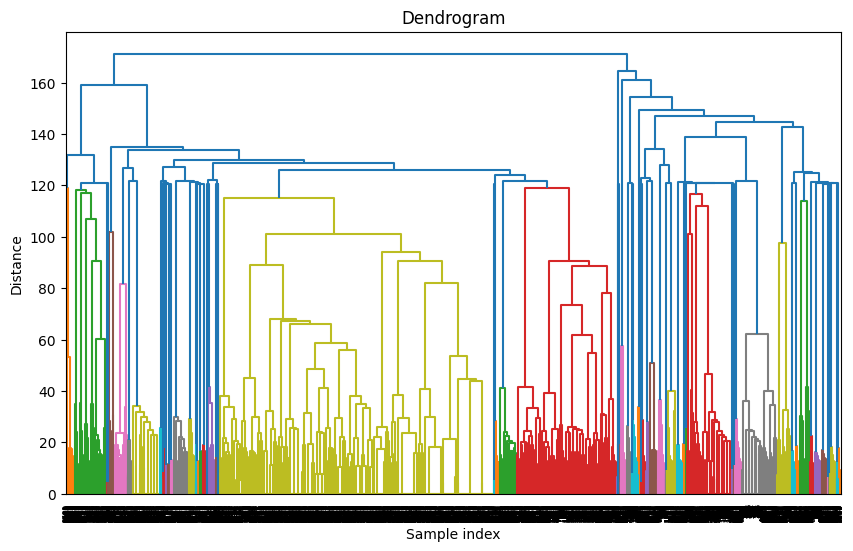

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcolo della matrice di linkage utilizzando il metodo di collegamento "ward"
Z = linkage(X_scaled, method='ward')

# Creazione del dendrogramma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Crea un oggetto di clustering gerarchico
clustering = AgglomerativeClustering(n_clusters=120, metric='euclidean', linkage='ward')

# Adatta il modello ai dati
clustering.fit(X_scaled)

# Ottieni le etichette dei cluster per ogni punto dati
labels = clustering.labels_



In [12]:
# Stampa le etichette dei cluster
print(labels)


[22  4  4 ... 10 10 11]


## Kmeans

In [13]:
from sklearn.metrics import silhouette_score

k_values = range(2, 7237)
# Calcola il valore medio della silhouette per ogni valore di k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Visualizza il grafico della silhouette analysis
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Valore medio della silhouette')
plt.title('Grafico della Silhouette Analysis')
optimal_k = k_values[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k + 0.1, max(silhouette_scores) - 0.1, f'k = {optimal_k}', color='r')
plt.show()

KeyboardInterrupt: 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Creazione dell'oggetto KMeans
kmeans = KMeans(n_clusters=optimal_k, n_init=10)

#predict the labels of clusters.
label = kmeans.fit_predict(X_scaled)
 
print(label)

# Etichettatura dei punti
labels = kmeans.labels_

# Ottenere i centroidi
centroids = kmeans.cluster_centers_

[ 86 134   9   5 145 136  81 138  63  79  61  77 156  26 155  15  44 153
  42  42  88  88  13 135  27 147  91  91  74  90  90  55  55  59 159  33
  62 137  47 141 146 151 135  68  68  38  38 127 127   2 112   2   2   2
   0   4   4 143 166 121 121  82  82 144  70 138 165 165   7   1  81 152
  81 154   7   7 161 105  14  28   3  31  31   1  19  54   6  32  73   1
  58  23  80  66 162  29  53  71 101 145 105 133  14 118 130 165 165   2
  83  14   2   2  94   2   2   2   2  14   2   2  14   2  14 125 114 114
 118 118   2  94  99   2 143 132 145 109 150  97 150 160  89 143  22 143
  20  85  20 108  16  57  72   8   8  48 100 115  20 129   5  20  85  40
  40 126  18  84 110 124 119 128  95 158  54 107  14  20 140 137  56  11
 157  69 122 150 113  76 120  75  65 103  65  76  93  41  25 136   2 106
 131 123  35  50 142  39 138 145  50  12  92 149  98 148  22  52 102  24
  97  20  30  67  17 116  87  14   6  51   2  36   2 145  49 117  46 111
 154  43  18  37  21 139   6 105 148 163  34  78  4

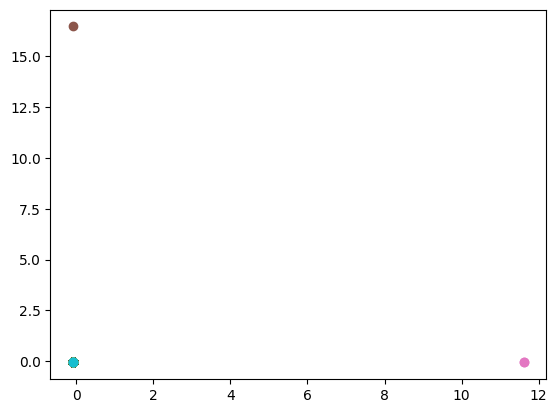

In [49]:
#Getting unique labels
 
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_scaled[labels == i , 0] , X_scaled[labels == i , 1] , label = i)
#plt.legend()
plt.show()

In [53]:
# Alternatively, you can create a new dataframe with the instances and labels
labels_df = pd.DataFrame({'Meal_Id': x['Meal_Id'], 'Name': x['Name'], 'catagory': x['catagory'], 'description': x['description'], 'Veg_Non': x['Veg_Non'], 'Nutrient': x['Nutrient'],'Disease': x['Disease'],'Diet': x['Diet'],'KMeans_Labels': labels})
# Save the dataframe to a file
labels_df.to_csv('..\\Dataset\\instances_with_labels.csv', index=False)
